In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from imblearn.combine import SMOTEENN, SMOTETomek

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import io
df = pd.read_csv(r"E:\sem 2\Project\Banksim Dataset.csv")

In [86]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


modifying the data frame according to our needs
1. changing the categorical variables to numerical type for the ease of computation
2. dropping the columns with merchant and customer zip code because both the columns take only 1 value for the entire data set
3. dropping transactions with amount=0, because if there has been no transaction at all there is no question of fraud in that case, having such data might be misleading and increases the non fraud cases unnecessarilly

In [87]:
encoder=LabelEncoder()
df['customer']=encoder.fit_transform(df['customer'])
df['age']=encoder.fit_transform(df['age'])
df['gender']=encoder.fit_transform(df['gender'])
df['merchant']=encoder.fit_transform(df['merchant'])
df['category']=encoder.fit_transform(df['category'])
df.drop(['zipcodeOri','zipMerchant'],axis=1,inplace=True)
df=df.query('amount>0') #give filtered dataframe according to condition.
df.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


splitting the data frame into 2 other data frame, one for fraud and one for non fraud cases respectively

In [88]:
fraud = df[df['fraud']==1]
non_fraud = df[df['fraud']==0]
print(fraud.shape , non_fraud.shape)

(7200, 8) (587391, 8)


splitting the data from into dependent (y) and independent variables (x)

In [89]:
x=df.drop('fraud',axis=1)
y=df['fraud']
print(x.head())
print(y.head())

   step  customer  age  gender  merchant  category  amount
0     0       210    4       2        30        12    4.55
1     0      2753    2       2        30        12   39.68
2     0      2285    4       1        18        12   26.89
3     0      1650    3       2        30        12   17.25
4     0      3585    5       2        30        12   35.72
0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64


correlation between the variable

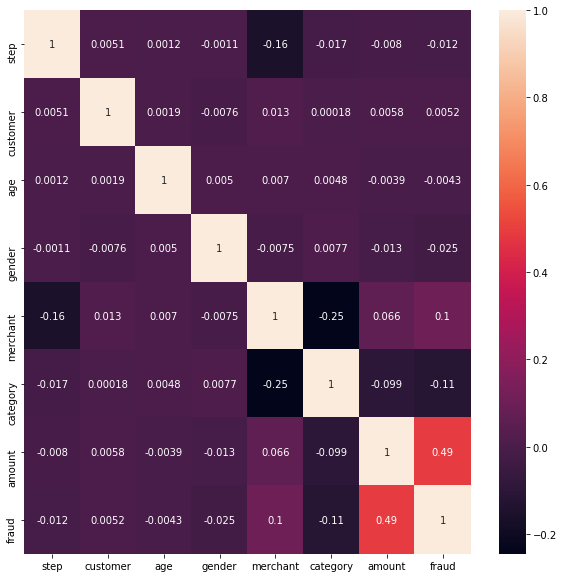

In [90]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

checking whether fraud is dependent on other categorical variables or not, using chi square test of independence for categorical variables

In [91]:
from scipy.stats import chi2_contingency
chisq=df
alpha=0.05

print('chi sq test of independence between fraud and steps')
chisq_table=pd.crosstab(chisq['fraud'],chisq['step'])
stat, p, dof, expected = chi2_contingency(chisq_table)
# interpret p-value
print("p value is " + str(p))
if p <= alpha:
     print('Dependent (reject H0)')
else:
     print('Independent (H0 holds true)')
print('\n')

print('chi sq test of independence between fraud and customer')
chisq_table=pd.crosstab(chisq['fraud'],chisq['customer'])
stat, p, dof, expected = chi2_contingency(chisq_table)
# interpret p-value
print("p value is " + str(p))
if p <= alpha:
     print('Dependent (reject H0)')
else:
     print('Independent (H0 holds true)')
print('\n')

print('chi sq test of independence between fraud age')
chisq_table=pd.crosstab(chisq['fraud'],chisq['age'])
stat, p, dof, expected = chi2_contingency(chisq_table)
# interpret p-value
print("p value is " + str(p))
if p <= alpha:
     print('Dependent (reject H0)')
else:
     print('Independent (H0 holds true)')
print('\n')

print('chi sq test of independence between fraud and gender')
chisq_table=pd.crosstab(chisq['fraud'],chisq['gender'])
stat, p, dof, expected = chi2_contingency(chisq_table)
# interpret p-value
print("p value is " + str(p))
if p <= alpha:
     print('Dependent (reject H0)')
else:
     print('Independent (H0 holds true)')
print('\n')

print('chi sq test of independence between fraud and merchant')
chisq_table=pd.crosstab(chisq['fraud'],chisq['merchant'])
stat, p, dof, expected = chi2_contingency(chisq_table)
# interpret p-value
print("p value is " + str(p))
if p <= alpha:
     print('Dependent (reject H0)')
else:
     print('Independent (H0 holds true)')
print('\n')

print('chi sq test of independence between fraud and category')
chisq_table=pd.crosstab(chisq['fraud'],chisq['category'])
stat, p, dof, expected = chi2_contingency(chisq_table)
# interpret p-value
print("p value is " + str(p))
if p <= alpha:
     print('Dependent (reject H0)')
else:
     print('Independent (H0 holds true)')
print('\n')

chi sq test of independence between fraud and steps
p value is 0.999999936271118
Independent (H0 holds true)


chi sq test of independence between fraud and customer
p value is 0.0
Dependent (reject H0)


chi sq test of independence between fraud age
p value is 2.00866504430546e-07
Dependent (reject H0)


chi sq test of independence between fraud and gender
p value is 5.932305999855071e-85
Dependent (reject H0)


chi sq test of independence between fraud and merchant
p value is 0.0
Dependent (reject H0)


chi sq test of independence between fraud and category
p value is 0.0
Dependent (reject H0)




splitting into training and testing sets

In [92]:
x_new=pd.DataFrame(data=df,columns=['amount','category','merchant','gender','age','customer'])
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=0)

creating a new data frame for the ease of keeping track of how each models work

In [93]:
models={'name':['logistic regression (simple)','logistic regression (under sampling)','logistic regression (over sampling)','logistic regression (smote)','support vector machine (simple)','support vector machine (under sampling)','support vector machine (over sampling)','support vector machine (smote)','decision tree (simple)','decision tree (under sampling)','decision tree (over sampling)','decision tree (smote)','random forest (simple)','random forest (under sampling)','random forest (over sampling)','random forest (smote)','naive bayes (simple)','naive bayes (under sampling)','naive bayes (over sampling)','naive bayes (smote)','knn (simple)','knn (under sampling)','knn (over sampling)','knn (smote)','Gradient boosting']}
models = pd.DataFrame(models)
models['accuracy']=np.nan
models['precision score']=np.nan
models['recall score']=np.nan
models['f1 score']=np.nan
models['difference in accuracy (in %)']=np.nan
models['difference in recall (in %)']=np.nan
models['difference in precision (in %)']=np.nan
models['difference in f1 score (in %)']=np.nan
models.head()

,name,accuracy,precision score,recall score,f1 score,difference in accuracy (in %),difference in recall (in %),difference in precision (in %),difference in f1 score (in %)
0,logistic regression (simple),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,logistic regression (under sampling),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,logistic regression (over sampling),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,logistic regression (smote),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,support vector machine (simple),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


a function for implementation of models and computing how well they re performing

In [94]:
def get_report(model,x_train,x_test,y_train,y_test,name):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(name,'\n')
  classification_report_m=classification_report(y_test,y_pred)
  print(classification_report_m)
  confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
  print('confusion matrix')
  print(confusion_matrix, '\n')

  print('for test data')
  accuracy=accuracy_score(y_test,y_pred)
  print('accuracy =',accuracy)
  precision_score_m=precision_score(y_test,y_pred)
  print('presicion score = ',precision_score_m)
  recall_score_m=recall_score(y_test,y_pred)
  print('recall score =',recall_score_m)
  f1_score_m=f1_score(y_test,y_pred)
  print('F1 score =',f1_score_m)
  print('\n')

  print('for train data')
  y_pred_train=model.predict(x_train)
  accuracy_t=accuracy_score(y_train,y_pred_train)
  print('accuracy =',accuracy_t)
  precision_score_m_t=precision_score(y_train,y_pred_train)
  print('presicion score = ',precision_score_m_t)
  recall_score_m_t=recall_score(y_train,y_pred_train)
  print('recall score =',recall_score_m_t)
  f1_score_m_t=f1_score(y_train,y_pred_train)
  print('F1 score =',f1_score_m_t)
  print('\n')

  print('to understand whether our model is overfitting or underfitting')
  print('difference in f1 scores')
  print(f1_score_m_t,' - ',f1_score_m,' = ',f1_score_m_t-f1_score_m)
  print('in percentage = ',(f1_score_m_t-f1_score_m)*100)
  print('difference in recall scores')
  print(recall_score_m_t,' - ',recall_score_m,' = ',recall_score_m_t-recall_score_m)
  print('in percentage = ',(recall_score_m_t-recall_score_m)*100)
  print('difference in precision scores')
  print(precision_score_m_t,' - ',precision_score_m,' = ',precision_score_m_t-precision_score_m)
  print('in percentage = ',(precision_score_m_t-precision_score_m)*100)
  print('difference in accuracy scores')
  print(accuracy_t,' - ',accuracy,' = ',accuracy_t-accuracy)
  print('in percentage = ',(accuracy_t-accuracy)*100)

  models.loc[models['name'] == name, 'accuracy'] = accuracy
  models.loc[models['name'] == name, 'precision score'] = precision_score_m
  models.loc[models['name'] == name, 'recall score'] = recall_score_m
  models.loc[models['name'] == name, 'f1 score'] = f1_score_m
  models.loc[models['name'] == name, 'difference in f1 score (in %)'] = (f1_score_m_t-f1_score_m)*100
  models.loc[models['name'] == name, 'difference in accuracy (in %)'] = (accuracy_t-accuracy)*100
  models.loc[models['name'] == name, 'difference in recall (in %)'] = (recall_score_m_t-recall_score_m)*100
  models.loc[models['name'] == name, 'difference in precision (in %)'] = (precision_score_m_t-precision_score_m)*100

due to imbalance in our data, we decided to try 3 methods
1. under sampling
2. over sampling
3. smote
to understand how well the balancing techniques work for this data set

In [95]:
rus=RandomUnderSampler()
x2_train,y2_train=rus.fit_resample(x_train,y_train)
np.bincount(y2_train)

array([5735, 5735], dtype=int64)

In [96]:
ros = RandomOverSampler()
x3_train,y3_train=ros.fit_resample(x_train,y_train)
np.bincount(y3_train)

array([469937, 469937], dtype=int64)

In [97]:
smt=SMOTE()
x4_train,y4_train=smt.fit_resample(x_train,y_train)
np.bincount(y4_train)

array([469937, 469937], dtype=int64)

1. model - LOGISTIC REGRESSION

In [98]:
logistic_regression=LogisticRegression(max_iter=1000)

name='logistic regression (simple)'
get_report(logistic_regression,x_train,x_test,y_train,y_test,name)

logistic regression (simple) 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    117454
           1       0.88      0.58      0.70      1465

    accuracy                           0.99    118919
   macro avg       0.94      0.79      0.85    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[117336    118]
 [   618    847]] 

for test data
accuracy = 0.9938109133107409
presicion score =  0.877720207253886
recall score = 0.5781569965870307
F1 score = 0.697119341563786


for train data
accuracy = 0.9939454077599691
presicion score =  0.877745435300344
recall score = 0.5783783783783784
F1 score = 0.6972882068530585


to understand whether our model is overfitting or underfitting
difference in f1 scores
0.6972882068530585  -  0.697119341563786  =  0.00016886528927251288
in percentage =  0.016886528927251288
difference in recall scores
0.5783783783783784  -  0.5781569965870307  =  0.00022138179134767455
in p

In [99]:
name='logistic regression (under sampling)'
get_report(logistic_regression,x2_train,x_test,y2_train,y_test,name)

logistic regression (under sampling) 

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    117454
           1       0.16      0.88      0.27      1465

    accuracy                           0.94    118919
   macro avg       0.58      0.91      0.62    118919
weighted avg       0.99      0.94      0.96    118919

confusion matrix
[[110754   6700]
 [   170   1295]] 

for test data
accuracy = 0.9422295848434649
presicion score =  0.16197623514696685
recall score = 0.8839590443686007
F1 score = 0.273784355179704


for train data
accuracy = 0.9142981691368788
presicion score =  0.947289156626506
recall score = 0.8774193548387097
F1 score = 0.9110165655834163


to understand whether our model is overfitting or underfitting
difference in f1 scores
0.9110165655834163  -  0.273784355179704  =  0.6372322104037123
in percentage =  63.72322104037123
difference in recall scores
0.8774193548387097  -  0.8839590443686007  =  -0.006539689529891035
in

In [100]:
name ='logistic regression (over sampling)'
get_report(logistic_regression,x3_train,x_test,y3_train,y_test,name)

logistic regression (over sampling) 

              precision    recall  f1-score   support

           0       1.00      0.95      0.98    117454
           1       0.19      0.88      0.31      1465

    accuracy                           0.95    118919
   macro avg       0.59      0.91      0.64    118919
weighted avg       0.99      0.95      0.97    118919

confusion matrix
[[111950   5504]
 [   183   1282]] 

for test data
accuracy = 0.9521775326062277
presicion score =  0.18891836133215442
recall score = 0.875085324232082
F1 score = 0.3107502120955036


for train data
accuracy = 0.9132979527042987
presicion score =  0.9499258710155671
recall score = 0.8725935604134171
F1 score = 0.9096190511048483


to understand whether our model is overfitting or underfitting
difference in f1 scores
0.9096190511048483  -  0.3107502120955036  =  0.5988688390093447
in percentage =  59.88688390093447
difference in recall scores
0.8725935604134171  -  0.875085324232082  =  -0.002491763818664894
in

In [101]:
name = 'logistic regression (smote)'
get_report(logistic_regression,x4_train,x_test,y4_train,y_test,name)

logistic regression (smote) 

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    117454
           1       0.18      0.87      0.30      1465

    accuracy                           0.95    118919
   macro avg       0.59      0.91      0.64    118919
weighted avg       0.99      0.95      0.97    118919

confusion matrix
[[111679   5775]
 [   191   1274]] 

for test data
accuracy = 0.9498313978422287
presicion score =  0.1807348560079444
recall score = 0.8696245733788396
F1 score = 0.2992717876438807


for train data
accuracy = 0.9209542981293237
presicion score =  0.9489974715492548
recall score = 0.8897256440756952
F1 score = 0.9184062346585424


to understand whether our model is overfitting or underfitting
difference in f1 scores
0.9184062346585424  -  0.2992717876438807  =  0.6191344470146618
in percentage =  61.91344470146618
difference in recall scores
0.8897256440756952  -  0.8696245733788396  =  0.020101070696855627
in percent

In [102]:
models.dropna()

,name,accuracy,precision score,recall score,f1 score,difference in accuracy (in %),difference in recall (in %),difference in precision (in %),difference in f1 score (in %)
0,logistic regression (simple),0.993811,0.877720,0.578157,0.697119,0.013449,0.022138,0.002523,0.016887
1,logistic regression (under sampling),0.942230,0.161976,0.883959,0.273784,-2.793142,-0.653969,78.531292,63.723221
2,logistic regression (over sampling),0.952178,0.188918,0.875085,0.310750,-3.887958,-0.249176,76.100751,59.886884
3,logistic regression (smote),0.949831,0.180735,0.869625,0.299272,-2.887710,2.010107,76.826262,61.913445


here we are encountering a problem, which can be written in points as
1. if we do not use any sampling technique, we get a decent precision score, a bad recall score (which makes it a bad model)
2. but if we use any sampling technique then there is a significant increase in recall but also a significant decrease in precision
3. there is no significant difference between over sampling and smote
4. also there is a provision for us to say that there is an observable figure denoting over fitting in case of the sampling techniques

2. model - SUPPORT VECTOR MACHINE

In [103]:
#support_vector_machine=SVC()
#name='support vector machine (simple)'
#get_report(support_vector_machine,x_train,x_test,y_train,y_test,name)

In [104]:
#name='support vector machine (under sampling)'
#get_report(support_vector_machine,x2_train,x_test,y2_train,y_test,name)

In [105]:
#name='support vector machine (over sampling)'
#get_report(support_vector_machine,x3_train,x_test,y3_train,y_test,name)

In [106]:
#name='support vector machine (smote)'
#get_report(support_vector_machine,x4_train,x_test,y4_train,y_test,name)

3. model - DECISION TREE

In [107]:
gini = DecisionTreeClassifier(criterion = "gini",random_state = 100)

name='decision tree (simple)'
get_report(gini,x_train,x_test,y_train,y_test,name)

decision tree (simple) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117454
           1       0.75      0.77      0.76      1465

    accuracy                           0.99    118919
   macro avg       0.87      0.88      0.88    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[117074    380]
 [   340   1125]] 

for test data
accuracy = 0.9939454586735509
presicion score =  0.7475083056478405
recall score = 0.7679180887372014
F1 score = 0.7575757575757576


for train data
accuracy = 1.0
presicion score =  1.0
recall score = 1.0
F1 score = 1.0


to understand whether our model is overfitting or underfitting
difference in f1 scores
1.0  -  0.7575757575757576  =  0.24242424242424243
in percentage =  24.242424242424242
difference in recall scores
1.0  -  0.7679180887372014  =  0.23208191126279865
in percentage =  23.208191126279864
difference in precision scores
1.0  -  0.7475083056478405  =  0.2524

In [108]:
name='decision tree (under sampling)'
get_report(gini,x2_train,x_test,y2_train,y_test,name)

decision tree (under sampling) 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    117454
           1       0.26      0.98      0.41      1465

    accuracy                           0.97    118919
   macro avg       0.63      0.97      0.69    118919
weighted avg       0.99      0.97      0.97    118919

confusion matrix
[[113329   4125]
 [    36   1429]] 

for test data
accuracy = 0.9650097965842296
presicion score =  0.25729204177169607
recall score = 0.9754266211604096
F1 score = 0.40718051004416583


for train data
accuracy = 1.0
presicion score =  1.0
recall score = 1.0
F1 score = 1.0


to understand whether our model is overfitting or underfitting
difference in f1 scores
1.0  -  0.40718051004416583  =  0.5928194899558341
in percentage =  59.28194899558341
difference in recall scores
1.0  -  0.9754266211604096  =  0.024573378839590432
in percentage =  2.457337883959043
difference in precision scores
1.0  -  0.25729204177169607 

In [109]:
name='decision tree (over sampling)'
get_report(gini,x3_train,x_test,y3_train,y_test,name)

decision tree (over sampling) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117454
           1       0.77      0.74      0.75      1465

    accuracy                           0.99    118919
   macro avg       0.88      0.87      0.87    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[117124    330]
 [   385   1080]] 

for test data
accuracy = 0.993987504099429
presicion score =  0.7659574468085106
recall score = 0.7372013651877133
F1 score = 0.7513043478260869


for train data
accuracy = 1.0
presicion score =  1.0
recall score = 1.0
F1 score = 1.0


to understand whether our model is overfitting or underfitting
difference in f1 scores
1.0  -  0.7513043478260869  =  0.2486956521739131
in percentage =  24.869565217391308
difference in recall scores
1.0  -  0.7372013651877133  =  0.2627986348122867
in percentage =  26.27986348122867
difference in precision scores
1.0  -  0.7659574468085106  =  0.2

In [110]:
name='decision tree (smote)'
get_report(gini,x4_train,x_test,y4_train,y_test,name)

decision tree (smote) 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    117454
           1       0.58      0.81      0.68      1465

    accuracy                           0.99    118919
   macro avg       0.79      0.90      0.84    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[116598    856]
 [   278   1187]] 

for test data
accuracy = 0.9904640974108426
presicion score =  0.5810083210964269
recall score = 0.8102389078498293
F1 score = 0.676738882554162


for train data
accuracy = 1.0
presicion score =  1.0
recall score = 1.0
F1 score = 1.0


to understand whether our model is overfitting or underfitting
difference in f1 scores
1.0  -  0.676738882554162  =  0.32326111744583796
in percentage =  32.3261117445838
difference in recall scores
1.0  -  0.8102389078498293  =  0.18976109215017067
in percentage =  18.97610921501707
difference in precision scores
1.0  -  0.5810083210964269  =  0.4189916789

4. model - RANDOM FOREST CLASSIFIER

In [111]:
rfc=RandomForestClassifier(n_estimators=100)

name='random forest (simple)'
get_report(rfc,x_train,x_test,y_train,y_test,name)

random forest (simple) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117454
           1       0.87      0.76      0.81      1465

    accuracy                           1.00    118919
   macro avg       0.94      0.88      0.91    118919
weighted avg       1.00      1.00      1.00    118919

confusion matrix
[[117293    161]
 [   350   1115]] 

for test data
accuracy = 0.9957029574752563
presicion score =  0.8738244514106583
recall score = 0.7610921501706485
F1 score = 0.8135716891645385


for train data
accuracy = 0.9999957954220555
presicion score =  1.0
recall score = 0.9996512641673932
F1 score = 0.9998256016742239


to understand whether our model is overfitting or underfitting
difference in f1 scores
0.9998256016742239  -  0.8135716891645385  =  0.18625391250968537
in percentage =  18.625391250968537
difference in recall scores
0.9996512641673932  -  0.7610921501706485  =  0.2385591139967448
in percentage =  23.8559113996

In [112]:
name='random forest (under sampling)'
get_report(rfc,x2_train,x_test,y2_train,y_test,name)

random forest (under sampling) 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    117454
           1       0.25      0.99      0.40      1465

    accuracy                           0.96    118919
   macro avg       0.62      0.98      0.69    118919
weighted avg       0.99      0.96      0.97    118919

confusion matrix
[[113112   4342]
 [    18   1447]] 

for test data
accuracy = 0.9633363886342805
presicion score =  0.24995681464847125
recall score = 0.9877133105802047
F1 score = 0.3989523021781087


for train data
accuracy = 1.0
presicion score =  1.0
recall score = 1.0
F1 score = 1.0


to understand whether our model is overfitting or underfitting
difference in f1 scores
1.0  -  0.3989523021781087  =  0.6010476978218913
in percentage =  60.10476978218912
difference in recall scores
1.0  -  0.9877133105802047  =  0.012286689419795271
in percentage =  1.2286689419795271
difference in precision scores
1.0  -  0.24995681464847125  

In [113]:
name='random forest (over sampling)'
get_report(rfc,x3_train,x_test,y3_train,y_test,name)

random forest (over sampling) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117454
           1       0.81      0.79      0.80      1465

    accuracy                           1.00    118919
   macro avg       0.91      0.90      0.90    118919
weighted avg       1.00      1.00      1.00    118919

confusion matrix
[[117186    268]
 [   302   1163]] 

for test data
accuracy = 0.9952068214498945
presicion score =  0.8127183787561146
recall score = 0.7938566552901024
F1 score = 0.8031767955801105


for train data
accuracy = 1.0
presicion score =  1.0
recall score = 1.0
F1 score = 1.0


to understand whether our model is overfitting or underfitting
difference in f1 scores
1.0  -  0.8031767955801105  =  0.19682320441988954
in percentage =  19.682320441988953
difference in recall scores
1.0  -  0.7938566552901024  =  0.2061433447098976
in percentage =  20.61433447098976
difference in precision scores
1.0  -  0.8127183787561146  =  0

In [114]:
name='random forest (smote)'
get_report(rfc,x4_train,x_test,y4_train,y_test,name)

random forest (smote) 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    117454
           1       0.62      0.86      0.72      1465

    accuracy                           0.99    118919
   macro avg       0.81      0.93      0.86    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[116668    786]
 [   201   1264]] 

for test data
accuracy = 0.9917002329316593
presicion score =  0.6165853658536585
recall score = 0.8627986348122867
F1 score = 0.7192034139402561


for train data
accuracy = 0.9999989360275952
presicion score =  1.0
recall score = 0.9999978720551904
F1 score = 0.9999989360264633


to understand whether our model is overfitting or underfitting
difference in f1 scores
0.9999989360264633  -  0.7192034139402561  =  0.28079552208620717
in percentage =  28.07955220862072
difference in recall scores
0.9999978720551904  -  0.8627986348122867  =  0.13719923724290373
in percentage =  13.71992372429

5. model - KNN

In [115]:
knn=KNeighborsClassifier()

name = 'knn (simple)'
get_report(knn,x_train,x_test,y_train,y_test,name)

knn (simple) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117454
           1       0.82      0.61      0.70      1465

    accuracy                           0.99    118919
   macro avg       0.91      0.81      0.85    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[117261    193]
 [   568    897]] 

for test data
accuracy = 0.9936006861813503
presicion score =  0.8229357798165138
recall score = 0.6122866894197952
F1 score = 0.7021526418786693


for train data
accuracy = 0.9947379707025009
presicion score =  0.8747680890538033
recall score = 0.6577157802964254
F1 score = 0.7508709067383299


to understand whether our model is overfitting or underfitting
difference in f1 scores
0.7508709067383299  -  0.7021526418786693  =  0.048718264859660576
in percentage =  4.871826485966057
difference in recall scores
0.6577157802964254  -  0.6122866894197952  =  0.04542909087663016
in percentage =  4.54290

In [116]:
name = 'knn (under sampling)'
get_report(knn,x2_train,x_test,y2_train,y_test,name)

knn (under sampling) 

              precision    recall  f1-score   support

           0       1.00      0.95      0.98    117454
           1       0.19      0.89      0.32      1465

    accuracy                           0.95    118919
   macro avg       0.60      0.92      0.65    118919
weighted avg       0.99      0.95      0.97    118919

confusion matrix
[[111952   5502]
 [   157   1308]] 

for test data
accuracy = 0.9524129869911452
presicion score =  0.1920704845814978
recall score = 0.8928327645051195
F1 score = 0.3161329305135952


for train data
accuracy = 0.9391455972101134
presicion score =  0.9649252353701311
recall score = 0.9114210985178727
F1 score = 0.9374103299856528


to understand whether our model is overfitting or underfitting
difference in f1 scores
0.9374103299856528  -  0.3161329305135952  =  0.6212773994720575
in percentage =  62.127739947205754
difference in recall scores
0.9114210985178727  -  0.8928327645051195  =  0.01858833401275317
in percentage =  

In [117]:
name = 'knn (over sampling)'
get_report(knn,x3_train,x_test,y3_train,y_test,name)

knn (over sampling) 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    117454
           1       0.50      0.75      0.60      1465

    accuracy                           0.99    118919
   macro avg       0.75      0.87      0.80    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[116349   1105]
 [   362   1103]] 

for test data
accuracy = 0.98766387204736
presicion score =  0.4995471014492754
recall score = 0.752901023890785
F1 score = 0.6005989654233597


for train data
accuracy = 0.9966410391180094
presicion score =  0.9933269075490283
recall score = 1.0
F1 score = 0.9966522839652143


to understand whether our model is overfitting or underfitting
difference in f1 scores
0.9966522839652143  -  0.6005989654233597  =  0.39605331854185466
in percentage =  39.605331854185465
difference in recall scores
1.0  -  0.752901023890785  =  0.24709897610921505
in percentage =  24.709897610921505
difference in p

In [118]:
name = 'knn (smote)'
get_report(knn,x4_train,x_test,y4_train,y_test,name)

knn (smote) 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    117454
           1       0.32      0.84      0.46      1465

    accuracy                           0.98    118919
   macro avg       0.66      0.91      0.72    118919
weighted avg       0.99      0.98      0.98    118919

confusion matrix
[[114806   2648]
 [   237   1228]] 

for test data
accuracy = 0.9757397892683255
presicion score =  0.31682146542827655
recall score = 0.8382252559726963
F1 score = 0.4598389814641453


for train data
accuracy = 0.9908689888219059
presicion score =  0.982838412317662
recall score = 0.9991849971379142
F1 score = 0.9909442961305912


to understand whether our model is overfitting or underfitting
difference in f1 scores
0.9909442961305912  -  0.4598389814641453  =  0.531105314666446
in percentage =  53.110531466644595
difference in recall scores
0.9991849971379142  -  0.8382252559726963  =  0.16095974116521794
in percentage =  16.0959741

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
name = 'Gradient boosting'
gbm=GradientBoostingClassifier()
get_report(gbm,x_train,x_test,y_train,y_test,name)


Gradient boosting 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117454
           1       0.91      0.70      0.79      1465

    accuracy                           1.00    118919
   macro avg       0.95      0.85      0.90    118919
weighted avg       1.00      1.00      1.00    118919

confusion matrix
[[117354    100]
 [   437   1028]] 

for test data
accuracy = 0.9954843212606901
presicion score =  0.9113475177304965
recall score = 0.7017064846416382
F1 score = 0.7929039722329349


for train data
accuracy = 0.9957449671202004
presicion score =  0.9178113037604143
recall score = 0.7107236268526591
F1 score = 0.8011006289308177


to understand whether our model is overfitting or underfitting
difference in f1 scores
0.8011006289308177  -  0.7929039722329349  =  0.008196656697882831
in percentage =  0.8196656697882831
difference in recall scores
0.7107236268526591  -  0.7017064846416382  =  0.009017142211020901
in percentage =  

In [120]:
models_used = models.dropna()
models_used

,name,accuracy,precision score,recall score,f1 score,difference in accuracy (in %),difference in recall (in %),difference in precision (in %),difference in f1 score (in %)
0,logistic regression (simple),0.993811,0.877720,0.578157,0.697119,0.013449,0.022138,0.002523,0.016887
1,logistic regression (under sampling),0.942230,0.161976,0.883959,0.273784,-2.793142,-0.653969,78.531292,63.723221
2,logistic regression (over sampling),0.952178,0.188918,0.875085,0.310750,-3.887958,-0.249176,76.100751,59.886884
3,logistic regression (smote),0.949831,0.180735,0.869625,0.299272,-2.887710,2.010107,76.826262,61.913445
8,decision tree (simple),0.993945,0.747508,0.767918,0.757576,0.605454,23.208191,25.249169,24.242424
9,decision tree (under sampling),0.965010,0.257292,0.975427,0.407181,3.499020,2.457338,74.270796,59.281949
10,decision tree (over sampling),0.993988,0.765957,0.737201,0.751304,0.601250,26.279863,23.404255,24.869565
11,decision tree (smote),0.990464,0.581008,0.810239,0.676739,0.953590,18.976109,41.899168,32.326112
12,random forest (simple),0.995703,0.873824,0.761092,0.813572,0.429284,23.855911,12.617555,18.625391
13,random forest (under sampling),0.963336,0.249957,0.987713,0.398952,3.666361,1.228669,75.004319,60.104770


In [121]:
models_used.sort_values(by='f1 score',ascending=False)

,name,accuracy,precision score,recall score,f1 score,difference in accuracy (in %),difference in recall (in %),difference in precision (in %),difference in f1 score (in %)
12,random forest (simple),0.995703,0.873824,0.761092,0.813572,0.429284,23.855911,12.617555,18.625391
14,random forest (over sampling),0.995207,0.812718,0.793857,0.803177,0.479318,20.614334,18.728162,19.682320
24,Gradient boosting,0.995484,0.911348,0.701706,0.792904,0.026065,0.901714,0.646379,0.819666
8,decision tree (simple),0.993945,0.747508,0.767918,0.757576,0.605454,23.208191,25.249169,24.242424
10,decision tree (over sampling),0.993988,0.765957,0.737201,0.751304,0.601250,26.279863,23.404255,24.869565
15,random forest (smote),0.991700,0.616585,0.862799,0.719203,0.829870,13.719924,38.341463,28.079552
20,knn (simple),0.993601,0.822936,0.612287,0.702153,0.113728,4.542909,5.183231,4.871826
0,logistic regression (simple),0.993811,0.877720,0.578157,0.697119,0.013449,0.022138,0.002523,0.016887
11,decision tree (smote),0.990464,0.581008,0.810239,0.676739,0.953590,18.976109,41.899168,32.326112
22,knn (over sampling),0.987664,0.499547,0.752901,0.600599,0.897717,24.709898,49.377981,39.605332


In [122]:
models_used.sort_values(by='recall score',ascending=False)

,name,accuracy,precision score,recall score,f1 score,difference in accuracy (in %),difference in recall (in %),difference in precision (in %),difference in f1 score (in %)
13,random forest (under sampling),0.963336,0.249957,0.987713,0.398952,3.666361,1.228669,75.004319,60.104770
9,decision tree (under sampling),0.965010,0.257292,0.975427,0.407181,3.499020,2.457338,74.270796,59.281949
21,knn (under sampling),0.952413,0.192070,0.892833,0.316133,-1.326739,1.858833,77.285475,62.127740
1,logistic regression (under sampling),0.942230,0.161976,0.883959,0.273784,-2.793142,-0.653969,78.531292,63.723221
2,logistic regression (over sampling),0.952178,0.188918,0.875085,0.310750,-3.887958,-0.249176,76.100751,59.886884
3,logistic regression (smote),0.949831,0.180735,0.869625,0.299272,-2.887710,2.010107,76.826262,61.913445
15,random forest (smote),0.991700,0.616585,0.862799,0.719203,0.829870,13.719924,38.341463,28.079552
23,knn (smote),0.975740,0.316821,0.838225,0.459839,1.512920,16.095974,66.601695,53.110531
11,decision tree (smote),0.990464,0.581008,0.810239,0.676739,0.953590,18.976109,41.899168,32.326112
14,random forest (over sampling),0.995207,0.812718,0.793857,0.803177,0.479318,20.614334,18.728162,19.682320


In [123]:
models_used.sort_values(by='difference in f1 score (in %)',ascending=False)

,name,accuracy,precision score,recall score,f1 score,difference in accuracy (in %),difference in recall (in %),difference in precision (in %),difference in f1 score (in %)
1,logistic regression (under sampling),0.942230,0.161976,0.883959,0.273784,-2.793142,-0.653969,78.531292,63.723221
21,knn (under sampling),0.952413,0.192070,0.892833,0.316133,-1.326739,1.858833,77.285475,62.127740
3,logistic regression (smote),0.949831,0.180735,0.869625,0.299272,-2.887710,2.010107,76.826262,61.913445
13,random forest (under sampling),0.963336,0.249957,0.987713,0.398952,3.666361,1.228669,75.004319,60.104770
2,logistic regression (over sampling),0.952178,0.188918,0.875085,0.310750,-3.887958,-0.249176,76.100751,59.886884
9,decision tree (under sampling),0.965010,0.257292,0.975427,0.407181,3.499020,2.457338,74.270796,59.281949
23,knn (smote),0.975740,0.316821,0.838225,0.459839,1.512920,16.095974,66.601695,53.110531
22,knn (over sampling),0.987664,0.499547,0.752901,0.600599,0.897717,24.709898,49.377981,39.605332
11,decision tree (smote),0.990464,0.581008,0.810239,0.676739,0.953590,18.976109,41.899168,32.326112
15,random forest (smote),0.991700,0.616585,0.862799,0.719203,0.829870,13.719924,38.341463,28.079552


In [124]:
models_used.sort_values(by='difference in recall (in %)',ascending=False)

,name,accuracy,precision score,recall score,f1 score,difference in accuracy (in %),difference in recall (in %),difference in precision (in %),difference in f1 score (in %)
10,decision tree (over sampling),0.993988,0.765957,0.737201,0.751304,0.601250,26.279863,23.404255,24.869565
22,knn (over sampling),0.987664,0.499547,0.752901,0.600599,0.897717,24.709898,49.377981,39.605332
12,random forest (simple),0.995703,0.873824,0.761092,0.813572,0.429284,23.855911,12.617555,18.625391
8,decision tree (simple),0.993945,0.747508,0.767918,0.757576,0.605454,23.208191,25.249169,24.242424
14,random forest (over sampling),0.995207,0.812718,0.793857,0.803177,0.479318,20.614334,18.728162,19.682320
11,decision tree (smote),0.990464,0.581008,0.810239,0.676739,0.953590,18.976109,41.899168,32.326112
23,knn (smote),0.975740,0.316821,0.838225,0.459839,1.512920,16.095974,66.601695,53.110531
15,random forest (smote),0.991700,0.616585,0.862799,0.719203,0.829870,13.719924,38.341463,28.079552
20,knn (simple),0.993601,0.822936,0.612287,0.702153,0.113728,4.542909,5.183231,4.871826
9,decision tree (under sampling),0.965010,0.257292,0.975427,0.407181,3.499020,2.457338,74.270796,59.281949
